# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from numpy.polynomial.polynomial import polyfit

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | hobart
Processing Record 2 of set 1 | east london
Processing Record 3 of set 1 | albany
Processing Record 4 of set 1 | tabou
Processing Record 5 of set 1 | klaksvik
Processing Record 6 of set 1 | noumea
Processing Record 7 of set 1 | rudnogorsk
Processing Record 8 of set 1 | punta arenas
Processing Record 9 of set 1 | rikitea
Processing Record 10 of set 1 | souillac
Processing Record 11 of set 1 | tungkang
Processing Record 12 of set 1 | itarema
Processing Record 13 of set 1 | auki
Processing Record 14 of set 1 | saskylakh
Processing Record 15 of set 1 | shakawe
Processing Record 16 of set 1 | qaanaaq
Processing Record 17 of set 1 | busselton
Processing Record 18 of set 1 | velikie luki
Processing Record 19 of set 1 | salalah
Processing Record 20 of set 1 | guerrero negro
Processing Record 21 of set 1 | batagay
Processing Record 22 of set 1 | acapulco
Processing Record 23 of set 1 | castro
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | mys shmidta
Processing Record 2 of Set 1 | egvekinot
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | ormara
Processing Record 6 of Set 1 | nadym
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | albany
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | mombetsu
Processing Record 11 of Set 1 | kieta
Processing Record 12 of Set 1 | vila franca do campo
Processing Record 13 of Set 1 | gopalpur
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | qidong
Processing Record 18 of Set 1 | hami
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | jiuquan
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | mar del plata
City not found. Skipping...

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [59]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds    
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()
weather_df.to_csv('weather.csv')

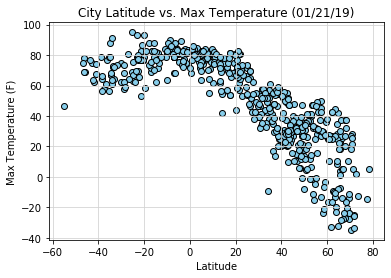

In [8]:

plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

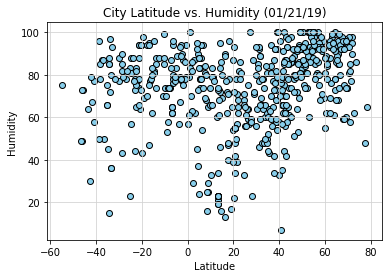

In [9]:

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

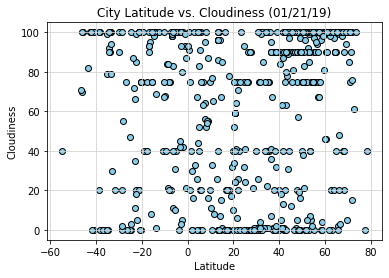

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

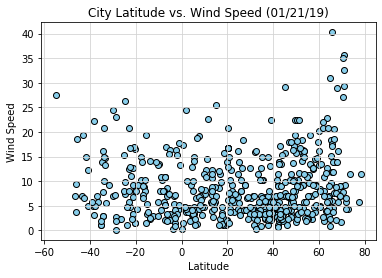

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/21/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots



In [60]:
# Create Northern and Southern Hemisphere DataFrames
n_weather_df = weather_df[weather_df.Lat >= 0]
n_weather_df.head()
n_weather_df.to_csv('n_weather.csv')
s_weather_df = weather_df[weather_df.Lat <= 0]
s_weather_df.head()
s_weather_df.to_csv('s_weather.csv')
print(len(s_weather_df['Lat']))
X = n_weather_df["Lat"]
np.reshape(X,-1, 136)
Y = n_weather_df["Max Temp"]
np.reshape(Y,-1, 136)
Y.head()

136


0    26.96
1   -13.90
2    81.19
3    80.60
4    71.65
Name: Max Temp, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

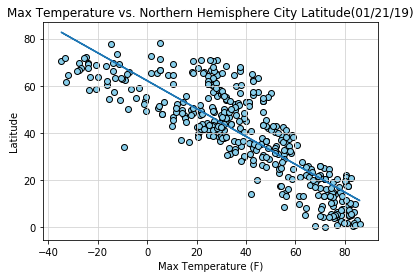

In [48]:
y = n_weather_df["Lat"]

x = n_weather_df["Max Temp"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Max Temperature vs. Northern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1n.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

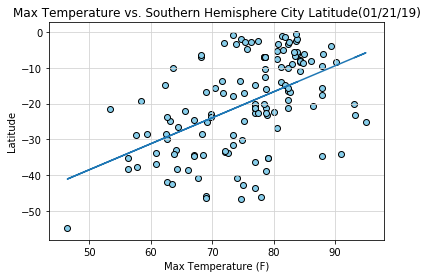

In [46]:
y = s_weather_df["Lat"]

x = s_weather_df["Max Temp"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Max Temperature vs. Southern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1s.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

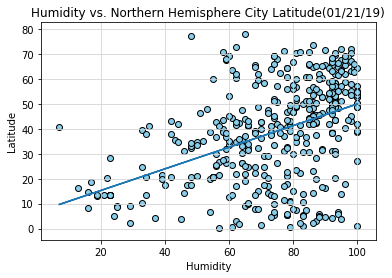

In [51]:
y = n_weather_df["Lat"]

x = n_weather_df["Humidity"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Humidity vs. Northern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2n.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

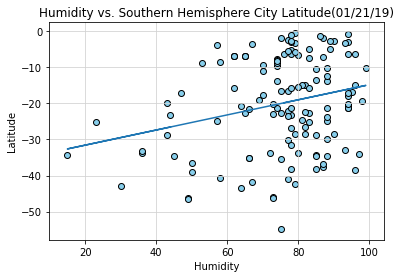

In [52]:
y = s_weather_df["Lat"]

x = s_weather_df["Humidity"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Humidity vs. Southern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2s.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

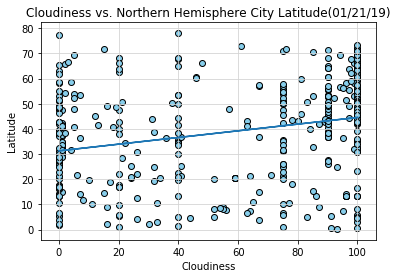

In [55]:
y = n_weather_df["Lat"]

x = n_weather_df["Cloudiness"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Cloudiness vs. Northern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3n.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

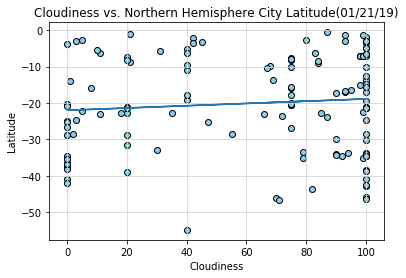

In [56]:
y = s_weather_df["Lat"]

x = s_weather_df["Cloudiness"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Cloudiness vs. Northern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3s.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

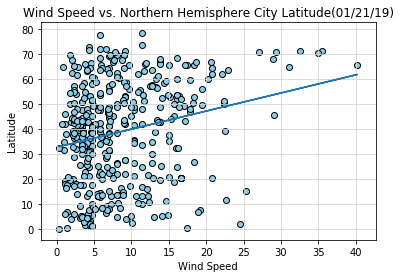

In [57]:
y = n_weather_df["Lat"]

x = n_weather_df["Wind Speed"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Wind Speed vs. Northern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4n.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

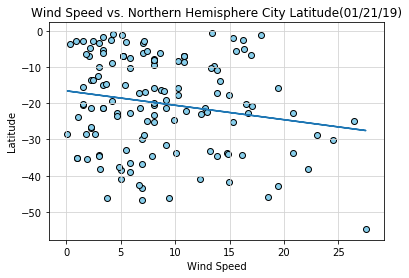

In [58]:
y = s_weather_df["Lat"]

x = s_weather_df["Wind Speed"]
# Fit with polyfit
b, m = polyfit(x, y, 1)
# Plot the scatterplot with the linear regression line

plt.plot(x, b + m * x, '-')
plt.scatter(x,y,edgecolors="black",facecolors="skyblue")
plt.title("Wind Speed vs. Northern Hemisphere City Latitude(01/21/19)")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4s.png")
plt.show()